# Exploring and Analyzing Formula 2
### Andry Rakotonjanabelo
This Jupyter Notebook is dedicated to exploring and analyzing data related to Formula 2. The goal is to gain insights into various aspects of the sport, such as driver performance, team statistics, race results, and other relevant metrics.

We will use Python for data manipulation, visualization, and statistical analysis. The notebook will include the following:

- Data preprocessing and cleaning
- Exploratory data analysis (EDA)
- Visualizations to uncover trends and patterns
- Statistical insights and interpretations

By the end of this analysis, we aim to derive meaningful conclusions and actionable insights about Formula 2.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [3]:
# Download latest version
path = kagglehub.dataset_download("alarchemn/formula-2-dataset")

print("Path to dataset files:", path)

# List files in the downloaded dataset directory
files = os.listdir(path)
print("Files in dataset directory:", files)

# Assuming the dataset is a CSV file, load it into a DataFrame
csv_file = [f for f in files if f.endswith('.csv')][0]  # Get the first CSV file
csv_path = os.path.join(path, csv_file)

# Create a DataFrame
formula_2_df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
print(formula_2_df.head())

Path to dataset files: C:\Users\Andry Arthur\.cache\kagglehub\datasets\alarchemn\formula-2-dataset\versions\4
Files in dataset directory: ['Feature-Race.csv', 'Free-Practice.csv', 'Qualifying-Session.csv', 'Sprint-Race-2.csv', 'Sprint-Race.csv']
   LAPS       TIME     GAP   INT.      KPH      BEST   LAP  POS  CAR  \
0    40  53:32.606       -      -  193.406  1:18.735  30.0  1.0    2   
1    40  53:35.569   2.963  2.963  193.228  1:18.602   9.0  2.0    8   
2    40  53:43.034  10.428  7.465  192.780  1:18.625  12.0  3.0    4   
3    40  53:43.392  10.786  0.358  192.759  1:18.573  10.0  4.0   19   
4    40  53:45.326  12.720  1.934  192.643  1:18.209  34.0  5.0    5   

        PILOT NAME            TEAM    CIRCUIT          TYPE     ROUND  \
0    N. Matsushita          Carlin  Spielberg  Feature Race  Round 6    
1       L. Ghiotto    UNI-Virtuosi  Spielberg  Feature Race  Round 6    
2      N. de Vries  ART Grand Prix  Spielberg  Feature Race  Round 6    
3        A. Hubert       BWT 

In [4]:
formula_2_df.head()

,LAPS,TIME,GAP,INT.,KPH,BEST,LAP,POS,CAR,PILOT NAME,TEAM,CIRCUIT,TYPE,ROUND,DATE
0,40,53:32.606,-,-,193.406,1:18.735,30.0,1.0,2,N. Matsushita,Carlin,Spielberg,Feature Race,Round 6,2019-06-30
1,40,53:35.569,2.963,2.963,193.228,1:18.602,9.0,2.0,8,L. Ghiotto,UNI-Virtuosi,Spielberg,Feature Race,Round 6,2019-06-30
2,40,53:43.034,10.428,7.465,192.780,1:18.625,12.0,3.0,4,N. de Vries,ART Grand Prix,Spielberg,Feature Race,Round 6,2019-06-30
3,40,53:43.392,10.786,0.358,192.759,1:18.573,10.0,4.0,19,A. Hubert,BWT Arden,Spielberg,Feature Race,Round 6,2019-06-30
4,40,53:45.326,12.720,1.934,192.643,1:18.209,34.0,5.0,5,S. Sette Câmara,DAMS,Spielberg,Feature Race,Round 6,2019-06-30


#### Reshaping and restructuring data to get insightful, workable information for clustering and modeling:

In [7]:
# List columns
print("Columns in the DataFrame:", formula_2_df.columns.tolist())

Columns in the DataFrame: ['LAPS', 'TIME', 'GAP', 'INT.', 'KPH', 'BEST', 'LAP', 'POS', 'CAR', 'PILOT NAME', 'TEAM', 'CIRCUIT', 'TYPE', 'ROUND', 'DATE']


In [57]:
f2_df = formula_2_df.copy()

# Drop Car #, Pilot name, Team, Circuit, Type, Round, and Date columns
f2_df.drop(columns=['INT.', 'LAP', 'CAR', 'TEAM', 'CIRCUIT', 'TYPE', 'ROUND', 'DATE'], inplace=True)

# Display the first few rows of the modified DataFrame
f2_df.head()

,LAPS,TIME,GAP,KPH,BEST,POS,PILOT NAME
0,40,53:32.606,-,193.406,1:18.735,1.0,N. Matsushita
1,40,53:35.569,2.963,193.228,1:18.602,2.0,L. Ghiotto
2,40,53:43.034,10.428,192.780,1:18.625,3.0,N. de Vries
3,40,53:43.392,10.786,192.759,1:18.573,4.0,A. Hubert
4,40,53:45.326,12.720,192.643,1:18.209,5.0,S. Sette Câmara


### Feature Engineering, if you will:

In [48]:
def convert_time_to_seconds(time_str):
    # If the string contains a colon, assume normal format.
    if ':' in time_str:
        parts = time_str.split(':')
        if len(parts) == 2:
            # "mm:ss.SSS" -> prepend hours as "00:"
            time_str = "00:" + time_str
        # Otherwise, assume it's already "hh:mm:ss.SSS"
    # Otherwise, if it has two dots, assume format "hh.mm.ss"
    elif time_str.count('.') == 2:
        # Replace the first two dots with colons.
        # Note: this works if the format is consistently hh.mm.ss (no milliseconds).
        splits = time_str.split('.')
        time_str = f"{splits[0]}:{splits[1]}:{splits[2]}"
    else:
        raise ValueError("Unexpected time format: " + time_str)
        
    # Use pd.to_timedelta to parse (expects hh:mm:ss.SSS)
    return pd.to_timedelta(time_str).total_seconds()

In [58]:
# Apply the conversion to create a new column (assuming column name is "TIME")
f2_df['TIME_seconds'] = formula_2_df['TIME'].apply(convert_time_to_seconds)

# Display the updated DataFrame from f2_df
print(f2_df[['TIME', 'TIME_seconds']].head())

        TIME  TIME_seconds
0  53:32.606      3212.606
1  53:35.569      3215.569
2  53:43.034      3223.034
3  53:43.392      3223.392
4  53:45.326      3225.326


In [59]:
# Drop Time column
f2_df.drop(columns=['TIME'], inplace=True)
# Display the first few rows of the modified DataFrame 
f2_df.head()

,LAPS,GAP,KPH,BEST,POS,PILOT NAME,TIME_seconds
0,40,-,193.406,1:18.735,1.0,N. Matsushita,3212.606
1,40,2.963,193.228,1:18.602,2.0,L. Ghiotto,3215.569
2,40,10.428,192.780,1:18.625,3.0,N. de Vries,3223.034
3,40,10.786,192.759,1:18.573,4.0,A. Hubert,3223.392
4,40,12.720,192.643,1:18.209,5.0,S. Sette Câmara,3225.326


In [60]:
# Convert BEST to seconds
f2_df['BEST_seconds'] = formula_2_df['BEST'].apply(convert_time_to_seconds)

# Display the updated DataFrame from f2_df
print(f2_df[['BEST', 'BEST_seconds']].head())

       BEST  BEST_seconds
0  1:18.735        78.735
1  1:18.602        78.602
2  1:18.625        78.625
3  1:18.573        78.573
4  1:18.209        78.209


In [61]:
# Drop BEST column
f2_df.drop(columns=['BEST'], inplace=True)

# Display the first few rows of the modified DataFrame
f2_df.head()


,LAPS,GAP,KPH,POS,PILOT NAME,TIME_seconds,BEST_seconds
0,40,-,193.406,1.0,N. Matsushita,3212.606,78.735
1,40,2.963,193.228,2.0,L. Ghiotto,3215.569,78.602
2,40,10.428,192.780,3.0,N. de Vries,3223.034,78.625
3,40,10.786,192.759,4.0,A. Hubert,3223.392,78.573
4,40,12.720,192.643,5.0,S. Sette Câmara,3225.326,78.209


In [62]:
# GAP: for - rows, fill with 0.0
f2_df['GAP'].replace('-', '0.0', inplace=True)

# GAP: For DNF, remove row
f2_df = f2_df[f2_df['GAP'] != 'DNF']

# GAP: For '1 LAP', replace with 60.0
f2_df['GAP'].replace('1 LAP', '60.0', inplace=True)



C:\Users\Andry Arthur\AppData\Local\Temp\ipykernel_24488\3455095524.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  f2_df['GAP'].replace('-', '0.0', inplace=True)
C:\Users\Andry Arthur\AppData\Local\Temp\ipykernel_24488\3455095524.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [63]:
f2_df.head()

,LAPS,GAP,KPH,POS,PILOT NAME,TIME_seconds,BEST_seconds
0,40,0.0,193.406,1.0,N. Matsushita,3212.606,78.735
1,40,2.963,193.228,2.0,L. Ghiotto,3215.569,78.602
2,40,10.428,192.780,3.0,N. de Vries,3223.034,78.625
3,40,10.786,192.759,4.0,A. Hubert,3223.392,78.573
4,40,12.720,192.643,5.0,S. Sette Câmara,3225.326,78.209


#### Collapse everything to one entry per unique driver:


In [65]:
# Group by "PILOT NAME":
# 1. SUM LAPS
# 2. AVG GAP
# 3. AVG KPH
# 4. AVG POS
# 5. AVG TIME_seconds
# 6. AVG BEST_seconds

grouped_f2_df = f2_df.groupby('PILOT NAME').agg({
    'LAPS': 'sum',
    'GAP': lambda x: pd.to_numeric(x, errors='coerce').mean(),
    'KPH': 'mean',
    'POS': 'mean',
    'TIME_seconds': 'mean',
    'BEST_seconds': 'mean'
}).reset_index()

grouped_f2_df.rename(columns={'GAP': 'AVG_GAP', 'KPH': 'AVG_KPH', 'POS': 'AVG_POS', 'TIME_seconds': 'AVG_TIME_seconds', 'BEST_seconds': 'AVG_BEST_seconds'}, inplace=True)

In [66]:
grouped_f2_df.head()

,PILOT NAME,LAPS,AVG_GAP,AVG_KPH,AVG_POS,AVG_TIME_seconds,AVG_BEST_seconds
0,A. Albon,643,19.690750,174.853100,6.750000,3427.984200,101.118650
1,A. Cordeel,633,44.316842,170.113263,14.631579,3643.803474,98.087158
2,A. Deledda,162,61.011333,147.306667,19.000000,3338.141833,105.159667
3,A. Fuoco,618,29.561684,171.479474,7.368421,3469.696368,101.381211
4,A. Hubert,270,28.590625,156.906625,8.625000,3899.069250,97.750125


In [67]:
#give me the list of all drivers from the grouped_f2_df dataframe
drivers = grouped_f2_df['PILOT NAME'].tolist()
print(drivers)

['A. Albon', 'A. Cordeel', 'A. Deledda', 'A. Fuoco', 'A. Hubert', 'A. Iwasa', 'A. Leclerc', 'A. Lorandi', 'A. Maini', 'A. Markelov', 'B. Benavides', 'B. Viscaal', 'C. Bölükbasi', 'C. Ilott', 'C. Leclerc', 'C. Lundgaard', 'C. Novalak', 'C. Williams', 'D. Beckmann', 'D. Boccolacci', 'D. Hauger', 'D. Ticktum', 'E. Fittipaldi', 'F. Drugovich', 'F. Vesti', 'G. Alesi', 'G. Malja', 'G. Petecof', 'G. Russell', 'G. Samaia', 'G. Zhou', 'I. Hadjar', 'J. Aitken', 'J. Cecotto', 'J. Correa', 'J. Crawford', 'J. Daruvala', 'J. Doohan', 'J. Hughes', 'J. King', 'J. Mason', 'J. Vips', 'K. Maini', 'L. Delétraz', 'L. Ghiotto', 'L. Lawson', 'L. Norris', 'L. Sargeant', 'L. Zendeli', 'M. Armstrong', 'M. Günther', 'M. Isaakyan', 'M. Nannini', 'M. Raghunathan', 'M. Sato', 'M. Schumacher', 'N. Fukuzumi', 'N. Jeffri', 'N. Kari', 'N. Latifi', 'N. Matsushita', 'N. Mazepin', 'N. Nato', 'N. de Vries', 'O. Bearman', 'O. Caldwell', 'O. Piastri', 'O. Rowland', "P. O'Ward", 'P. Piquet', 'R. Binder', 'R. Boschung', 'R. Ma

In [69]:
f1_status = [
    1, # A. Albon
    0, # A. Cordeel
    0, # A. Deledda
    0, # A. Fuoco
    0, # A. Hubert
    0, # A. Iwasa
    0, # A. Leclerc
    0, # A. Lorandi
    0, # A. Maini
    0, # A. Markelov
    0, # B. Benavides
    0, # B. Viscaal
    0, # C. Bölükbasi
    0, # C. Ilott
    1, # C. Leclerc
    0, # C. Lundgaard
    0, # C. Novalak
    0, # C. Williams
    0, # D. Beckmann
    0, # D. Boccolacci
    0, # D. Hauger
    0, # D. Ticktum
    0, # E. Fittipaldi
    0, # F. Drugovich
    0, # F. Vesti
    0, # G. Alesi
    0, # G. Malja
    0, # G. Petecof
    1, # G. Russell
    0, # G. Samaia
    1, # G. Zhou
    0, # I. Hadjar
    1, # J. Aitken
    0, # J. Cecotto
    0, # J. Correa
    0, # J. Crawford
    0, # J. Daruvala
    0, # J. Doohan
    0, # J. Hughes
    0, # J. King
    0, # J. Mason
    0, # J. Vips
    0, # K. Maini
    0, # L. Delétraz
    0, # L. Ghiotto
    1, # L. Lawson
    1, # L. Norris
    1, # L. Sargeant
    0, # L. Zendeli
    0, # M. Armstrong
    0, # M. Günther
    0, # M. Isaakyan
    0, # M. Nannini
    0, # M. Raghunathan
    0, # M. Sato
    1, # M. Schumacher
    0, # N. Fukuzumi
    0, # N. Jeffri
    0, # N. Kari
    1, # N. Latifi
    0, # N. Matsushita
    1, # N. Mazepin
    0, # N. Nato
    1, # N. de Vries
    1, # O. Bearman
    0, # O. Caldwell
    1, # O. Piastri
    0, # O. Rowland
    0, # P. O'Ward
    0, # P. Piquet
    0, # R. Binder
    0, # R. Boschung
    0, # R. Marciello
    1, # R. Merhi
    0, # R. Nissany
    0, # R. Shwartzman
    0, # R. Stanek
    0, # R. Tveter
    0, # R. Verschoor
    0, # R. Visoiu
    0, # S. Canamasas
    0, # S. Coletti
    0, # S. Ferrucci
    0, # S. Gelael
    0, # S. Sette Câmara
    1, # S. Sirotkin
    0, # T. Calderón
    0, # T. Makino
    0, # T. Pourchaire
    0, # V. Martins
    1, # Y. Tsunoda
    0, # Z. Maloney
    0  # Á. Palou
]



In [70]:
# Assuming grouped_f2_df is your grouped DataFrame.
grouped_f2_df['REACHED_F1'] = f1_status

# Verify the new column is added at the end
print(grouped_f2_df.head())

   PILOT NAME  LAPS    AVG_GAP     AVG_KPH    AVG_POS  AVG_TIME_seconds  \
0    A. Albon   643  19.690750  174.853100   6.750000       3427.984200   
1  A. Cordeel   633  44.316842  170.113263  14.631579       3643.803474   
2  A. Deledda   162  61.011333  147.306667  19.000000       3338.141833   
3    A. Fuoco   618  29.561684  171.479474   7.368421       3469.696368   
4   A. Hubert   270  28.590625  156.906625   8.625000       3899.069250   

   AVG_BEST_seconds  REACHED_F1  
0        101.118650           1  
1         98.087158           0  
2        105.159667           0  
3        101.381211           0  
4         97.750125           0  


In [71]:
grouped_f2_df.head()

,PILOT NAME,LAPS,AVG_GAP,AVG_KPH,AVG_POS,AVG_TIME_seconds,AVG_BEST_seconds,REACHED_F1
0,A. Albon,643,19.690750,174.853100,6.750000,3427.984200,101.118650,1
1,A. Cordeel,633,44.316842,170.113263,14.631579,3643.803474,98.087158,0
2,A. Deledda,162,61.011333,147.306667,19.000000,3338.141833,105.159667,0
3,A. Fuoco,618,29.561684,171.479474,7.368421,3469.696368,101.381211,0
4,A. Hubert,270,28.590625,156.906625,8.625000,3899.069250,97.750125,0


In [73]:
#count the number of drivers who reached F1
f1_count = grouped_f2_df['REACHED_F1'].sum()
print(f"Number of drivers who reached F1: {f1_count}")

Number of drivers who reached F1: 17


## ***Clustering***:

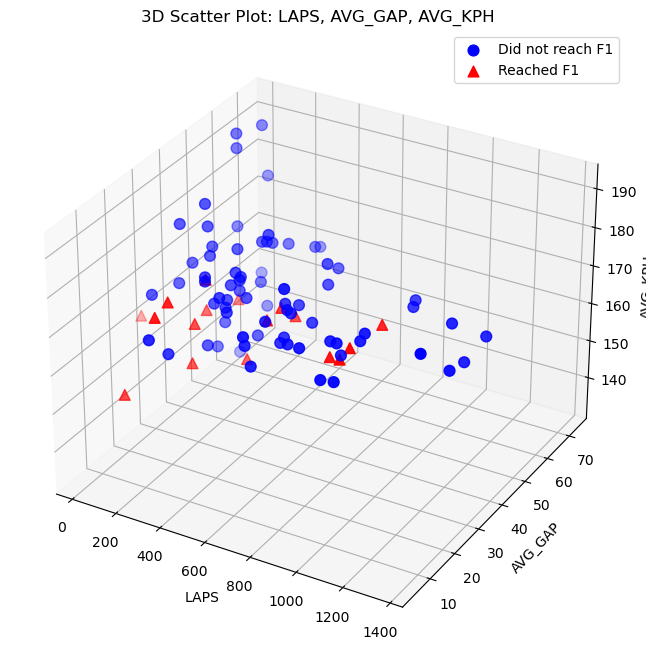

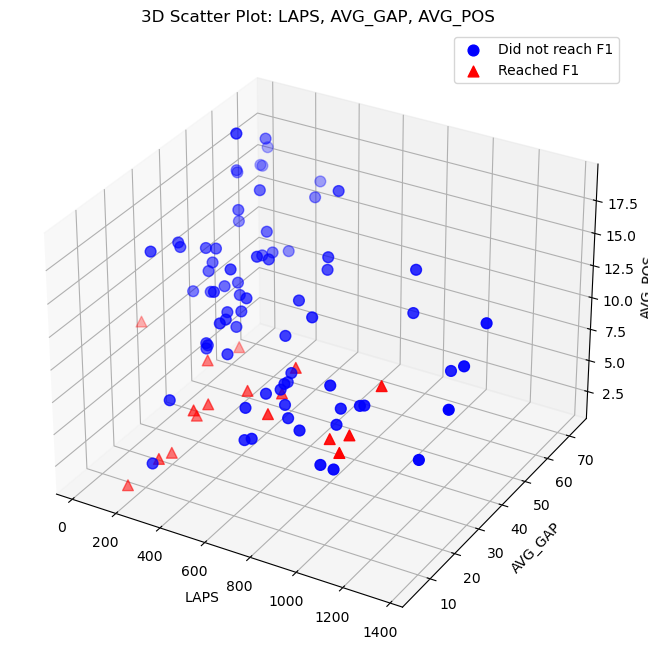

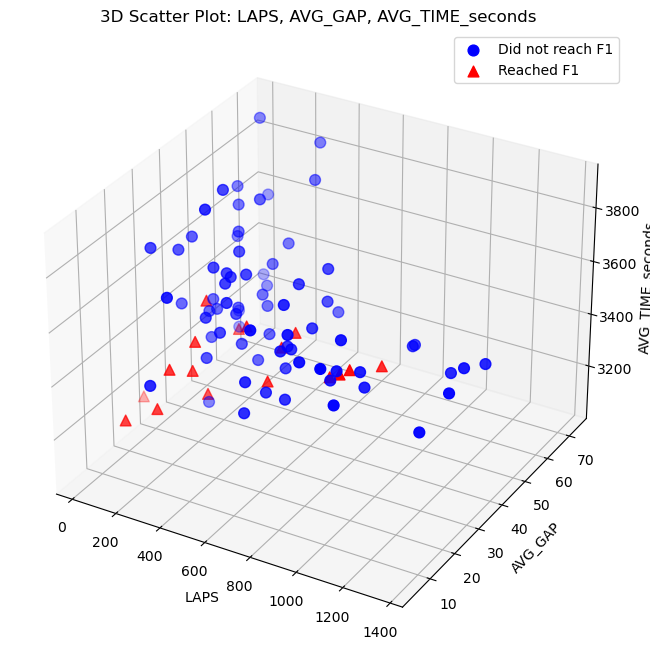

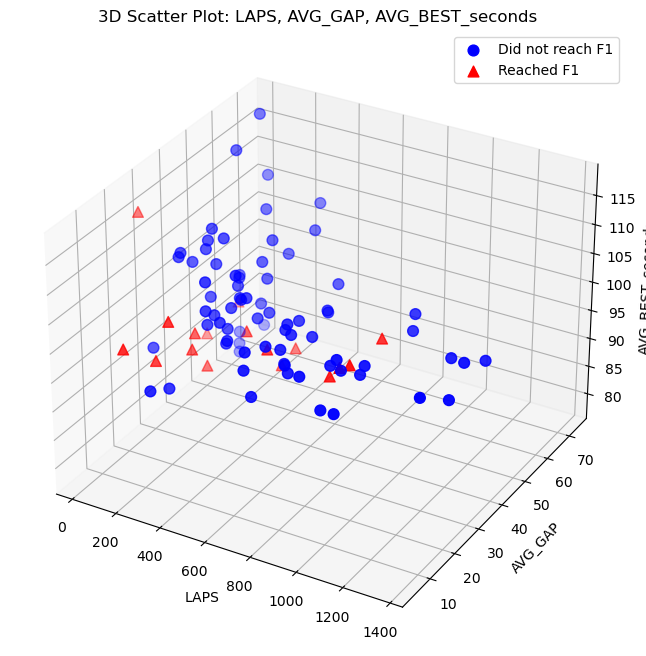

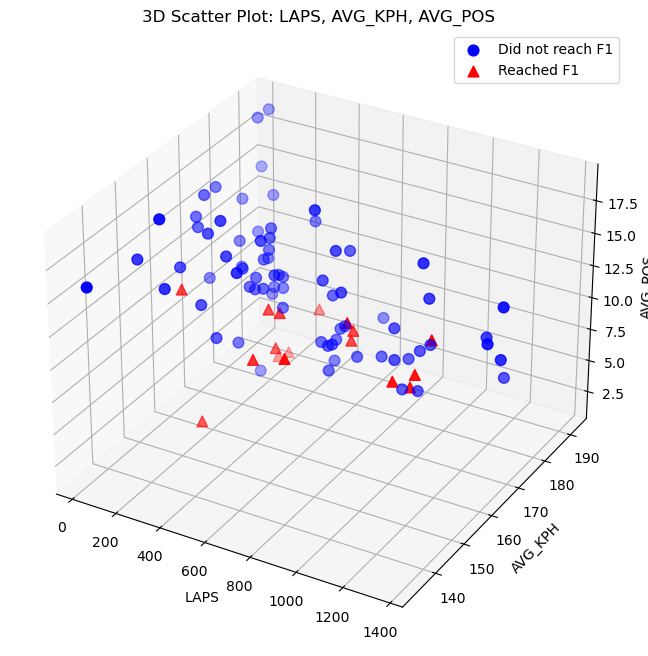

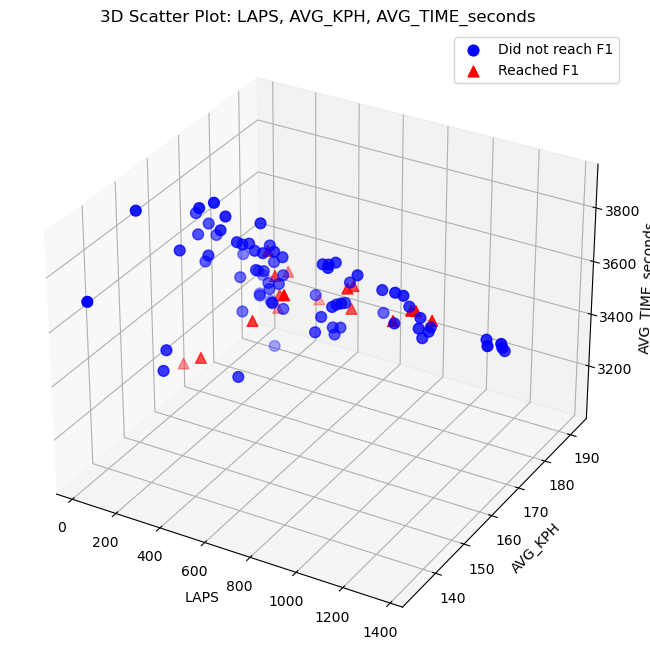

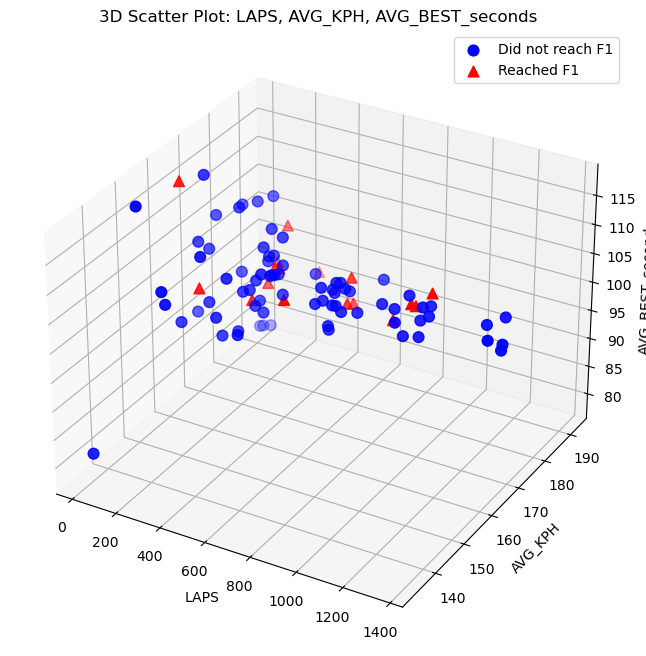

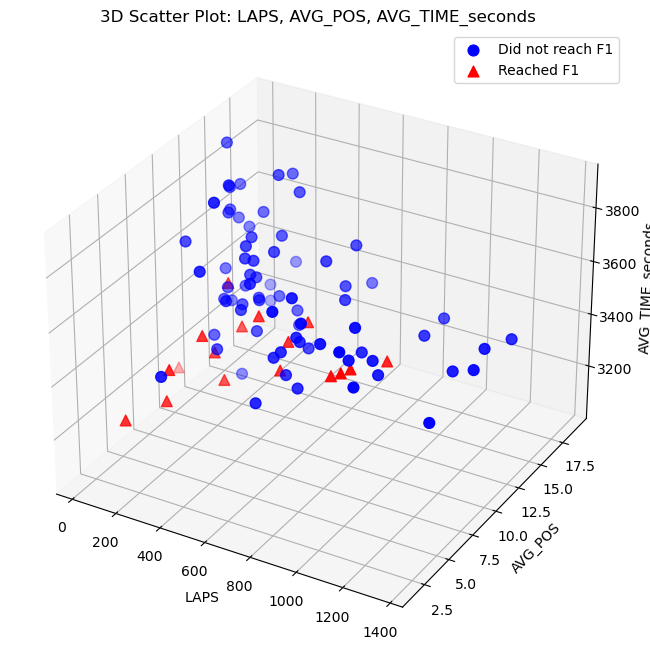

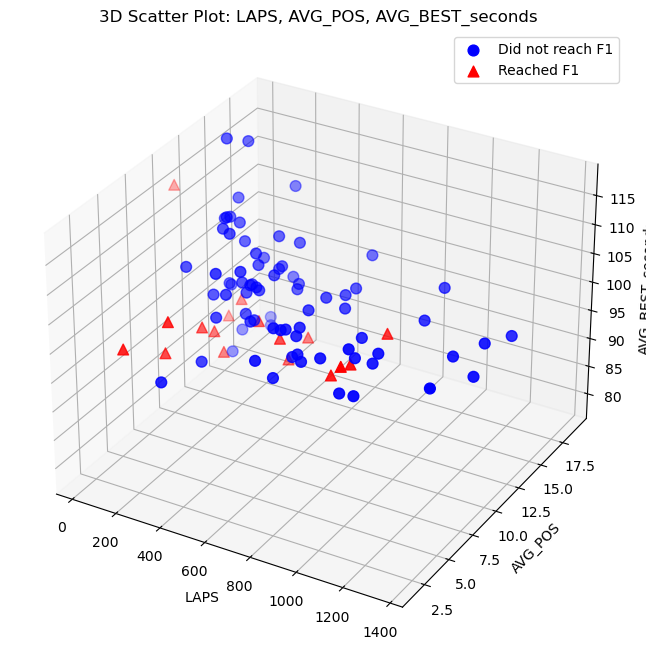

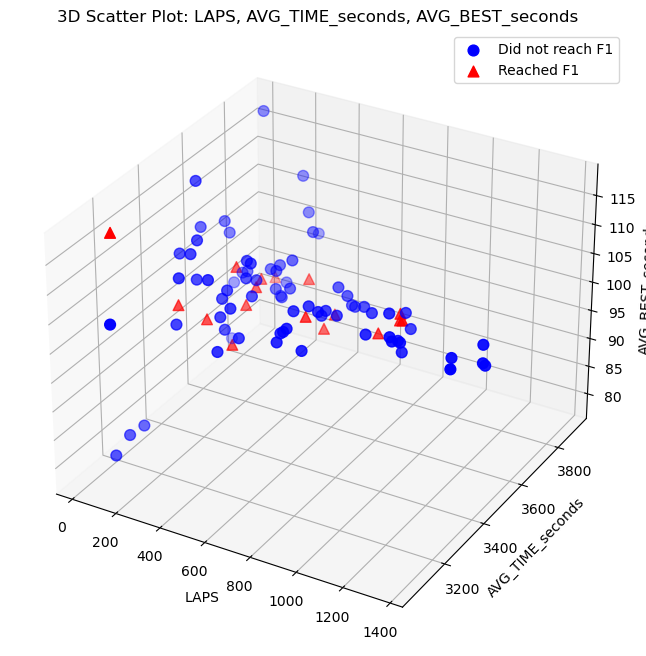

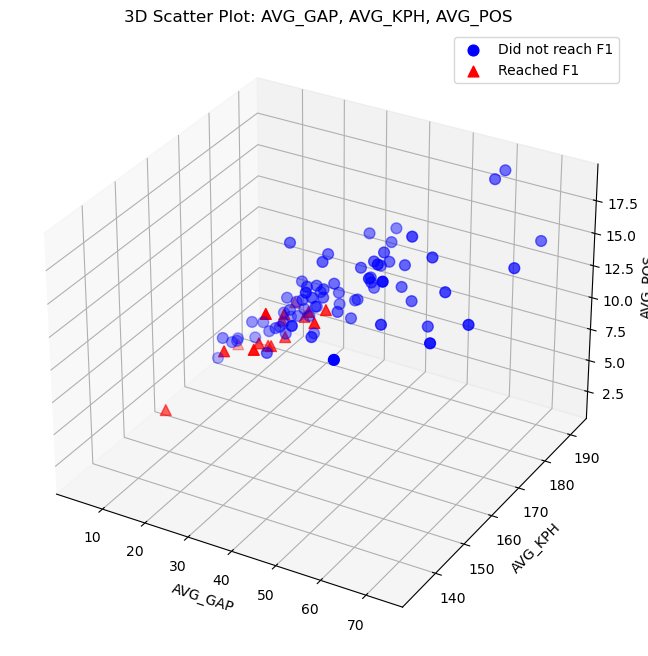

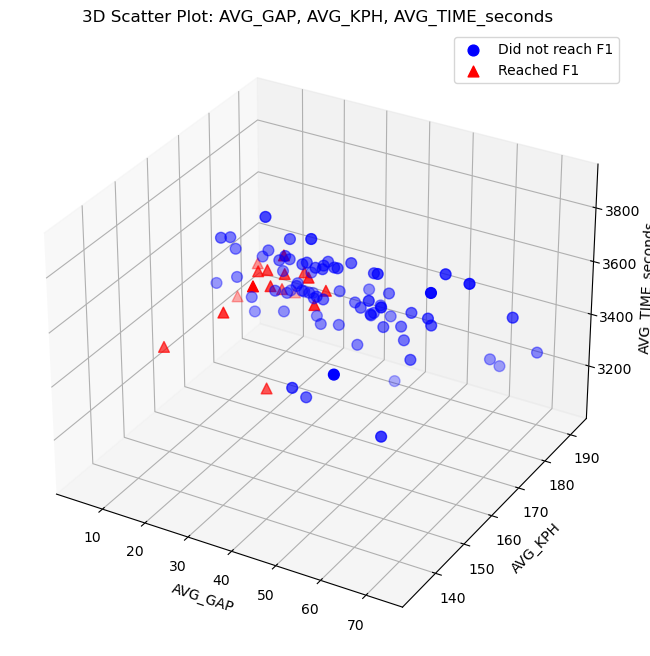

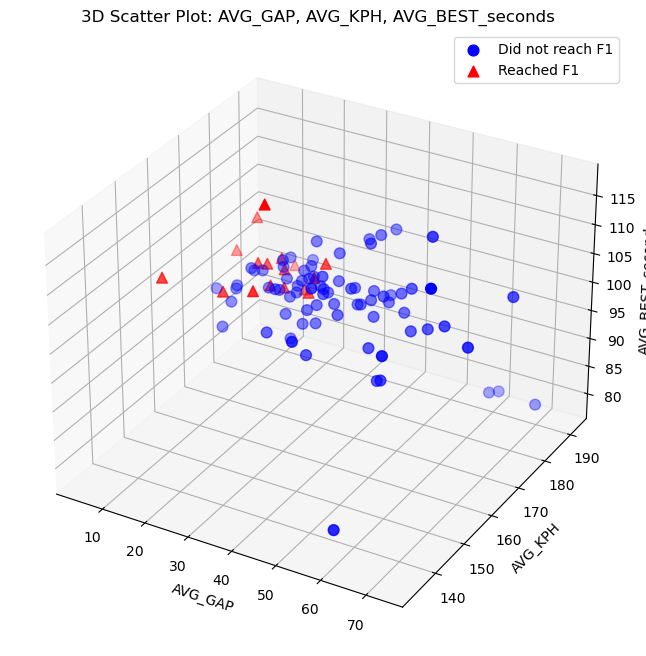

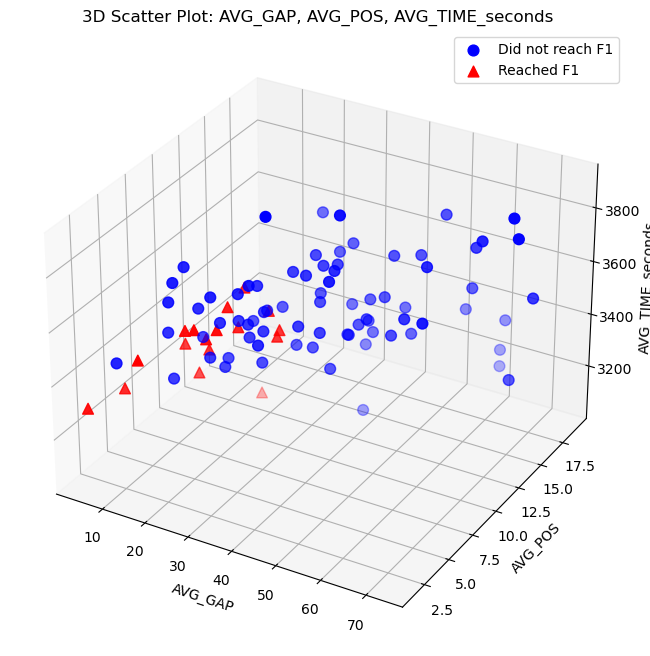

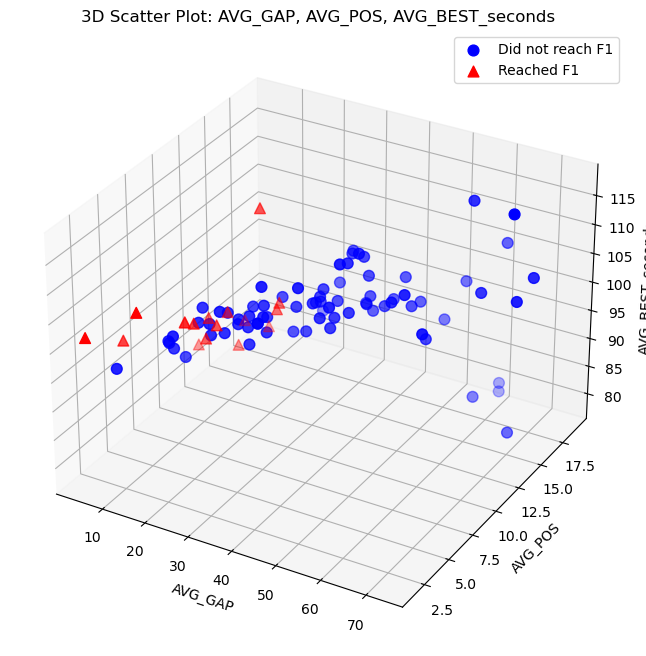

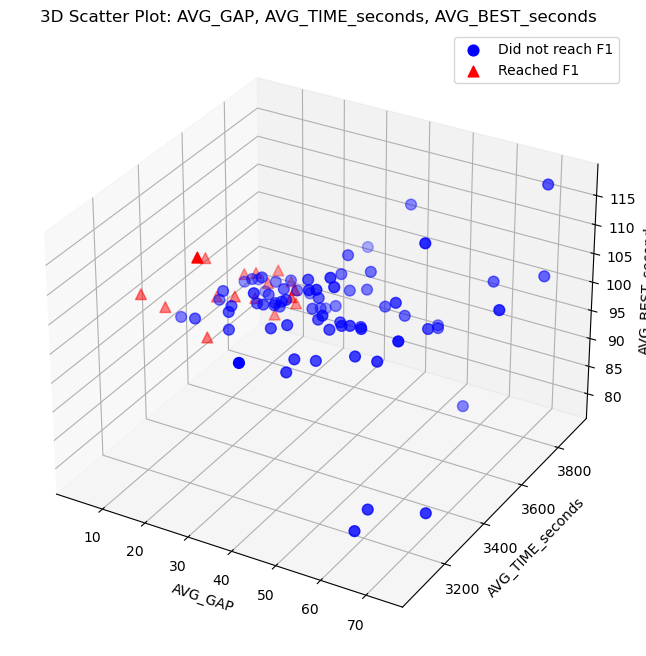

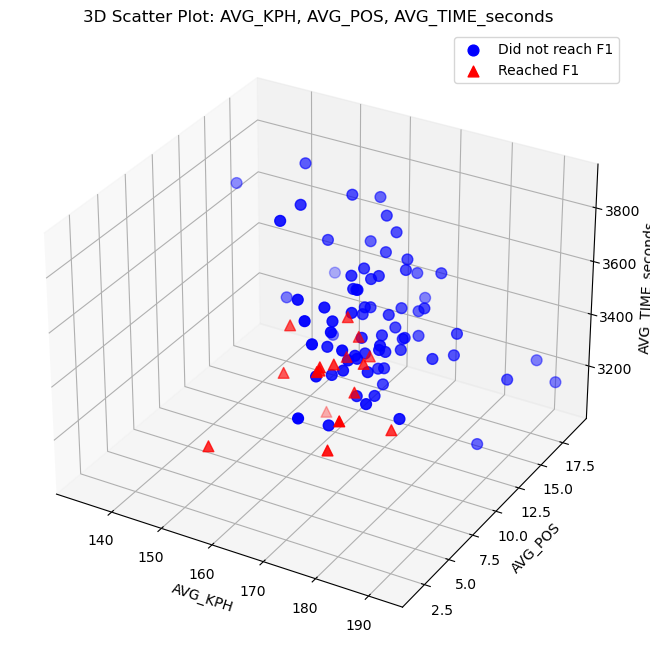

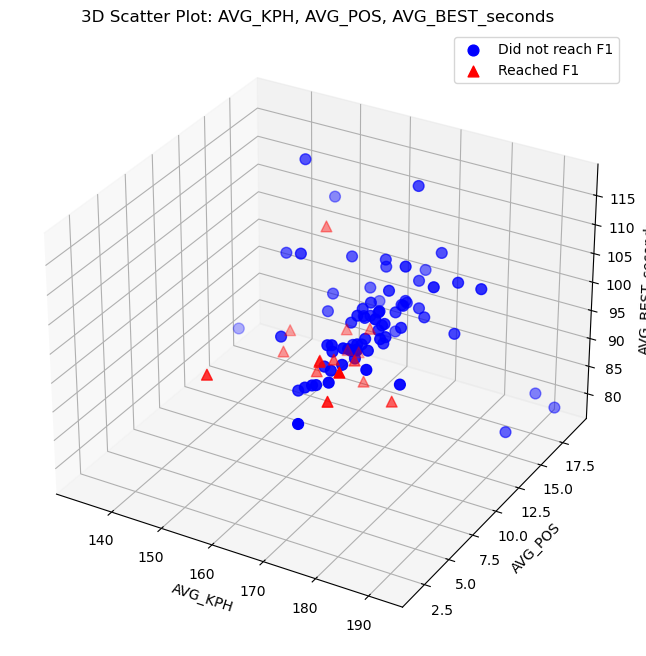

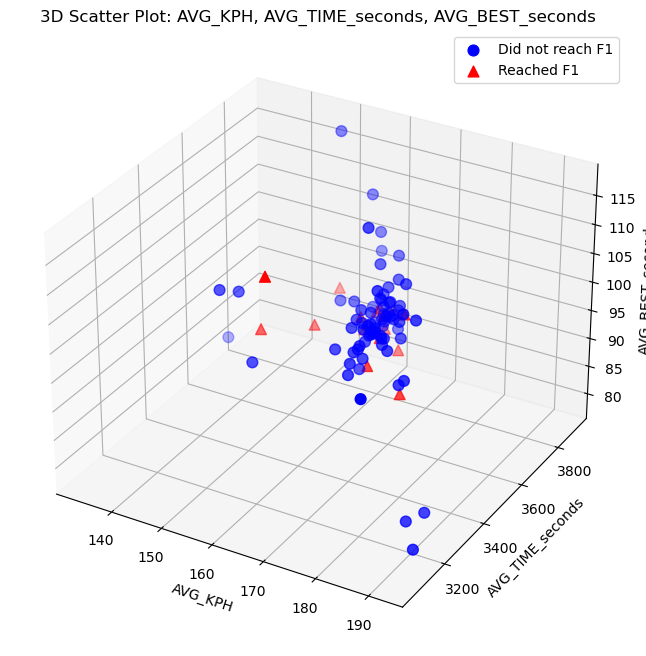

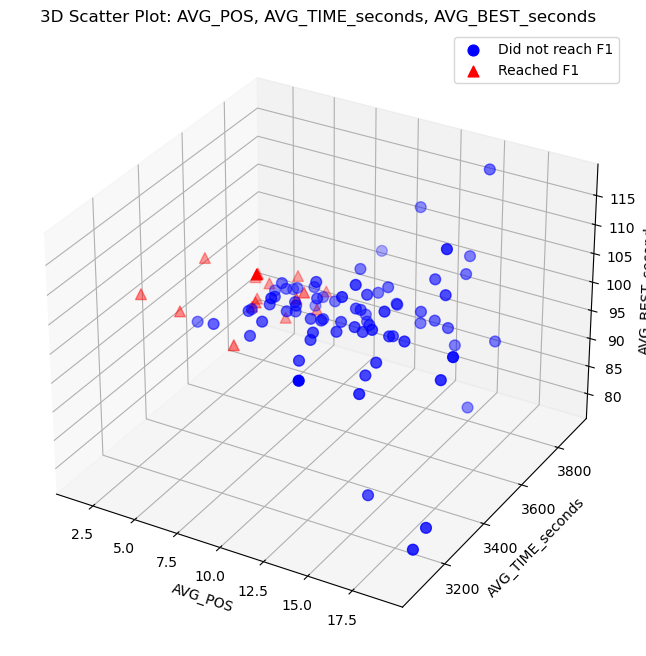

In [82]:
import itertools
from mpl_toolkits.mplot3d import Axes3D  # necessary for 3D plotting
import matplotlib.pyplot as plt

# List of non-target features
features_list = ['LAPS', 'AVG_GAP', 'AVG_KPH', 'AVG_POS', 'AVG_TIME_seconds', 'AVG_BEST_seconds']

# Separate the drivers based on F1 status
f1_drivers = grouped_f2_df[grouped_f2_df['REACHED_F1'] == 1]
non_f1_drivers = grouped_f2_df[grouped_f2_df['REACHED_F1'] != 1]

# Loop over all 3-feature combinations
for combo in itertools.combinations(features_list, 3):
    x_feature, y_feature, z_feature = combo
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot drivers who did not reach F1 in blue (using circle markers)
    ax.scatter(non_f1_drivers[x_feature], non_f1_drivers[y_feature], non_f1_drivers[z_feature],
               s=60, c='b', marker='o', label='Did not reach F1')
    
    # Plot drivers who reached F1 in red (using triangle markers for distinction)
    ax.scatter(f1_drivers[x_feature], f1_drivers[y_feature], f1_drivers[z_feature],
               s=60, c='r', marker='^', label='Reached F1')
    
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.set_zlabel(z_feature)
    plt.title(f"3D Scatter Plot: {x_feature}, {y_feature}, {z_feature}")
    plt.legend()
    plt.show()

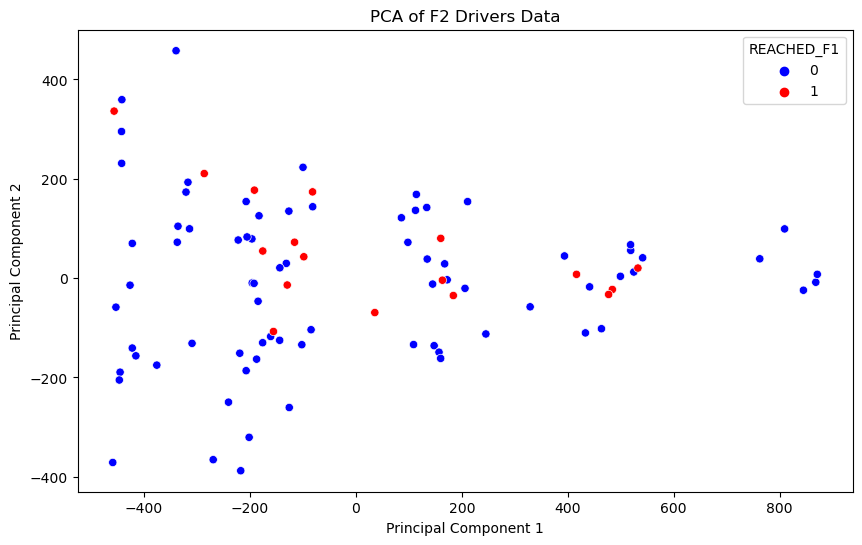

In [83]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the features for visualization
features = ['LAPS', 'AVG_GAP', 'AVG_KPH', 'AVG_POS', 'AVG_TIME_seconds', 'AVG_BEST_seconds']
X = grouped_f2_df[features]

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['PILOT NAME'] = grouped_f2_df['PILOT NAME']
pca_df['REACHED_F1'] = grouped_f2_df['REACHED_F1']

# Plot the PCA results with hue based on REACHED_F1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='REACHED_F1', palette={1:'red', 0:'blue'})
plt.title('PCA of F2 Drivers Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [90]:
# Pure‐NumPy KMeans to avoid BLAS/threadpoolctl issues

import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Extract and standardize features
features = ['LAPS', 'AVG_GAP', 'AVG_KPH', 'AVG_POS', 'AVG_TIME_seconds', 'AVG_BEST_seconds']
X = grouped_f2_df[features].values
X_scaled = StandardScaler().fit_transform(X)

# 2. Simple NumPy KMeans implementation
def numpy_kmeans(X, n_clusters=3, max_iter=100, tol=1e-4, random_state=42):
    rng = np.random.RandomState(random_state)
    # initialize centroids by sampling from X
    centroids = X[rng.choice(len(X), n_clusters, replace=False)]
    for _ in range(max_iter):
        # assign each point to nearest centroid
        dists = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
        labels = dists.argmin(axis=1)
        # recompute centroids
        new_centroids = np.vstack([
            X[labels == k].mean(axis=0) if np.any(labels == k) else centroids[k]
            for k in range(n_clusters)
        ])
        # check convergence
        if np.allclose(centroids, new_centroids, atol=tol):
            break
        centroids = new_centroids
    return centroids, labels

# 3. Run KMeans and assign clusters
centers, labels = numpy_kmeans(X_scaled, n_clusters=3)
grouped_f2_df['cluster'] = labels

# 4. Inspect results
print("Cluster centers (scaled):\n", centers)
print(grouped_f2_df[['PILOT NAME', 'cluster']].head())

Cluster centers (scaled):
 [[-0.71754147  0.82587075 -0.84004946  0.78065092  0.9824863   0.15220985]
 [ 0.59838431 -0.69666145  0.16790759 -0.73291095 -0.12017391  0.00112415]
 [-0.59248628  0.70354288  0.75632301  0.86753957 -1.09200678 -0.22291885]]
   PILOT NAME  cluster
0    A. Albon        1
1  A. Cordeel        0
2  A. Deledda        0
3    A. Fuoco        1
4   A. Hubert        0


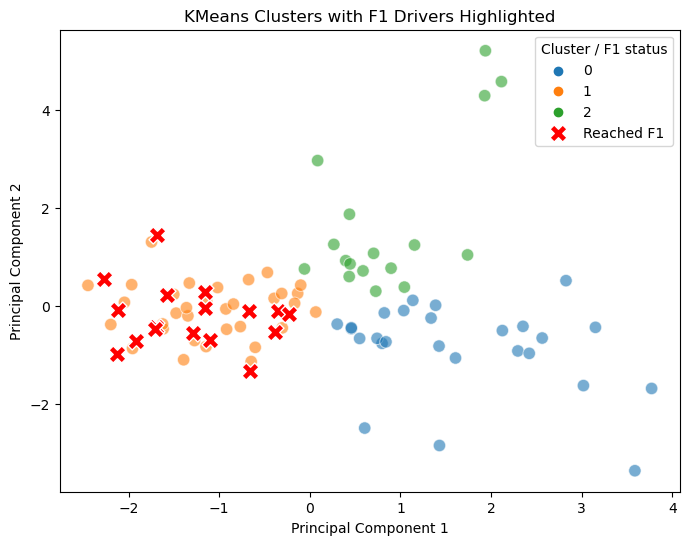

In [92]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prepare and scale your original feature set
features = ['LAPS', 'AVG_GAP', 'AVG_KPH', 'AVG_POS', 'AVG_TIME_seconds', 'AVG_BEST_seconds']
X = grouped_f2_df[features].values
X_scaled = StandardScaler().fit_transform(X)

# 2. Project into 2D with PCA
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_scaled)
viz_df = pd.DataFrame(pcs, columns=['PC1','PC2'])
viz_df['cluster'] = grouped_f2_df['cluster']
viz_df['REACHED_F1'] = grouped_f2_df['REACHED_F1']

# 3. Plot clusters in PCA space and highlight F1 drivers in red X
plt.figure(figsize=(8,6))

# plot non-F1 drivers colored by cluster
sns.scatterplot(
    data=viz_df[viz_df['REACHED_F1']==0],
    x='PC1', y='PC2',
    hue='cluster',
    palette='tab10',
    s=80,
    alpha=0.6,
    legend='brief'
)

# overlay F1 drivers in solid red X markers
sns.scatterplot(
    data=viz_df[viz_df['REACHED_F1']==1],
    x='PC1', y='PC2',
    color='red',
    marker='X',
    s=150,
    label='Reached F1'
)

plt.title('KMeans Clusters with F1 Drivers Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster / F1 status', loc='best')
plt.show()